# HOMEWORK 13 (FOR LECTURE 14)

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

(50000, 32, 32, 3)


/tmp/ipykernel_5876/4265084992.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


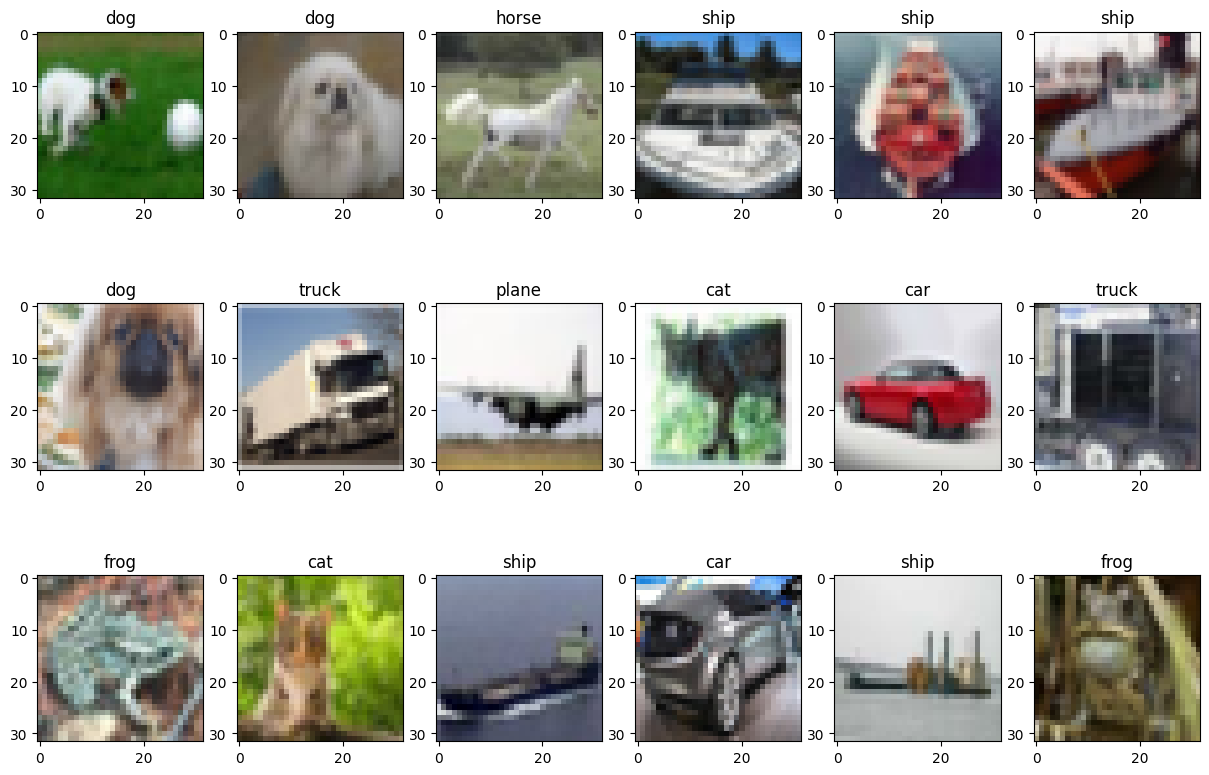

In [15]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]
print(x_train.shape)

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(y_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000] [-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]


(Text(0.5, 0, 'Y_test'), Text(0, 0.5, 'counts'))

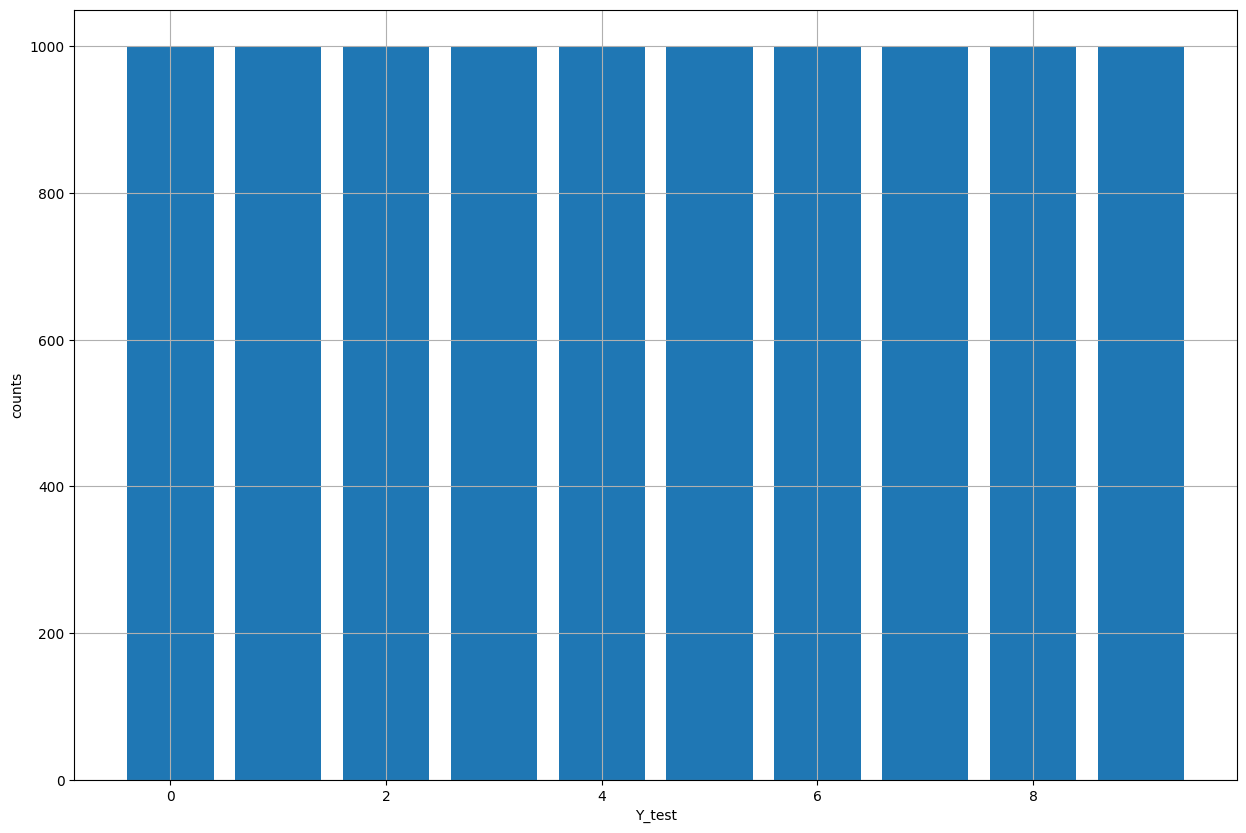

In [16]:
# Extract class identifiers
# Hint: Check the csv
ids = y_test
print(y_test)

num_classes = 10
centers = np.arange(0, num_classes + 1)
counts, bounds = np.histogram(ids, bins=centers-0.5)
print(counts,bounds)

plt.bar(centers[:-1], counts), plt.grid(True)
plt.xlabel('Y_test'), plt.ylabel('counts')

[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000] [-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]


(Text(0.5, 0, 'Y_train'), Text(0, 0.5, 'counts'))

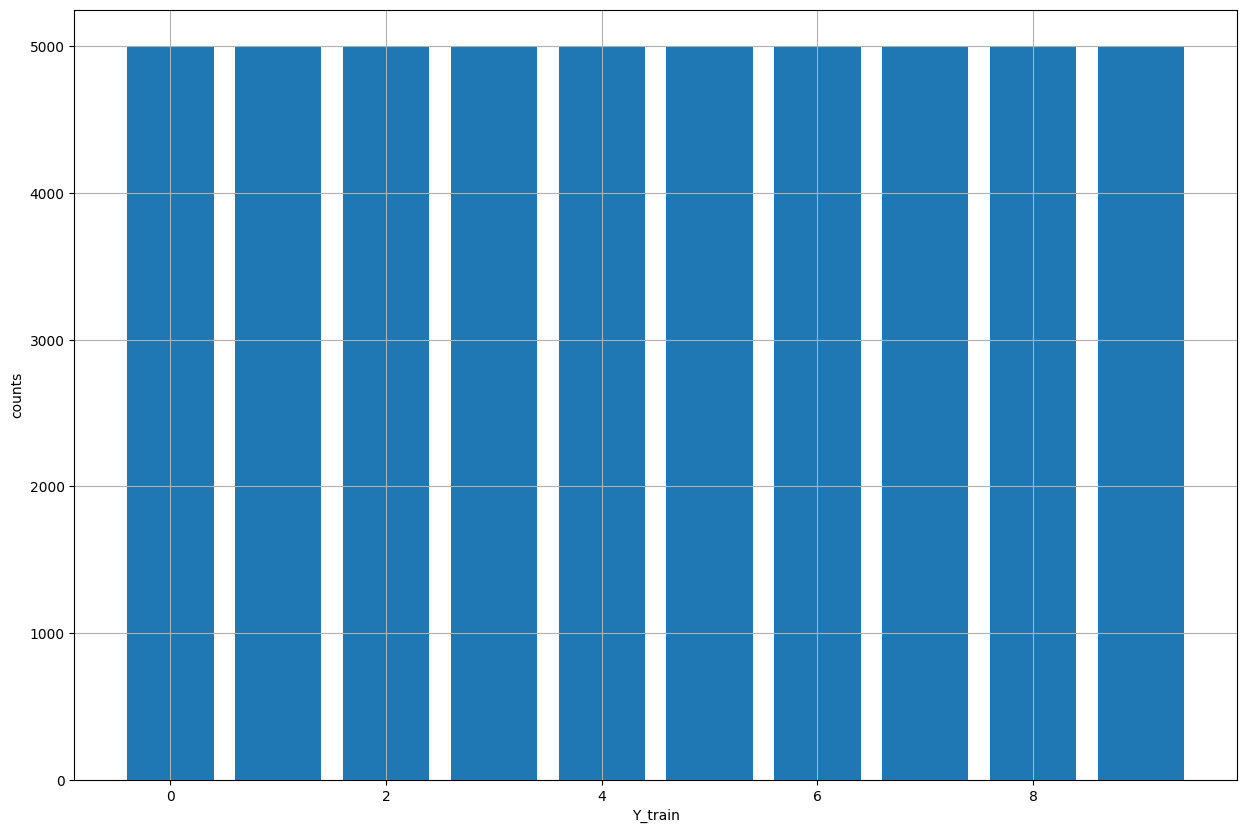

In [17]:
# Extract class identifiers
# Hint: Check the csv
ids = y_train

num_classes = 10
centers = np.arange(0, num_classes + 1)
counts, bounds = np.histogram(ids, bins=centers-0.5)
print(counts,bounds)

plt.bar(centers[:-1], counts), plt.grid(True)
plt.xlabel('Y_train'), plt.ylabel('counts')

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [18]:
# Normalization
x_train = x_train/255
x_test = x_test/255

print(y_train)
print(y_train.shape)

# Convert labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(y_train)
print(y_train.shape)

# One-hot encoding
y_train = np.eye(np.max(y_train) + 1)[y_train]
y_test = np.eye(np.max(y_test) + 1)[y_test]

y_train = np.reshape(y_train, (-1, num_classes))
y_test = np.reshape(y_test, (-1, num_classes))

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

print(y_train)
print(y_train.shape)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(50000, 10)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [41]:
size = x_train[100].shape[0]
print(f"size = {size}")

inputs = Input(shape=(size, size, 3))
net = Conv2D(96, kernel_size=(3, 3), activation="relu")(inputs) 

net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(256, kernel_size=(3, 3), activation="relu")(net) 
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(312, kernel_size=(3, 3), activation="relu")(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.4)(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

size = 32


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 13, 13, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 4, 4, 312)      │       719,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 2, 2, 128)      │       359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,304,130 (4.97 MB)

 Trainable params: 1,304,130 (4.97 MB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Training

Compile the model and train it.

In [42]:
epochs = 30
batch_size = 128

model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.2451 - loss: 0.0828 - val_accuracy: 0.5234 - val_loss: 0.0619
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5020 - loss: 0.0634 - val_accuracy: 0.5742 - val_loss: 0.0551
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5717 - loss: 0.0558 - val_accuracy: 0.6462 - val_loss: 0.0477
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6243 - loss: 0.0502 - val_accuracy: 0.6702 - val_loss: 0.0440
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6632 - loss: 0.0457 - val_accuracy: 0.6848 - val_loss: 0.0429
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6884 - loss: 0.0425 - val_accuracy: 0.7040 - val_loss: 0.0400
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7116 - loss: 0.0396 - val_accuracy: 0.7016 - val_loss: 0.0406
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7340 - loss: 0.0370 - val_accuracy: 

Let's now plot the history to see the evolution of the training.

Train Acc      0.9020666480064392
Validation Acc 0.7656000256538391


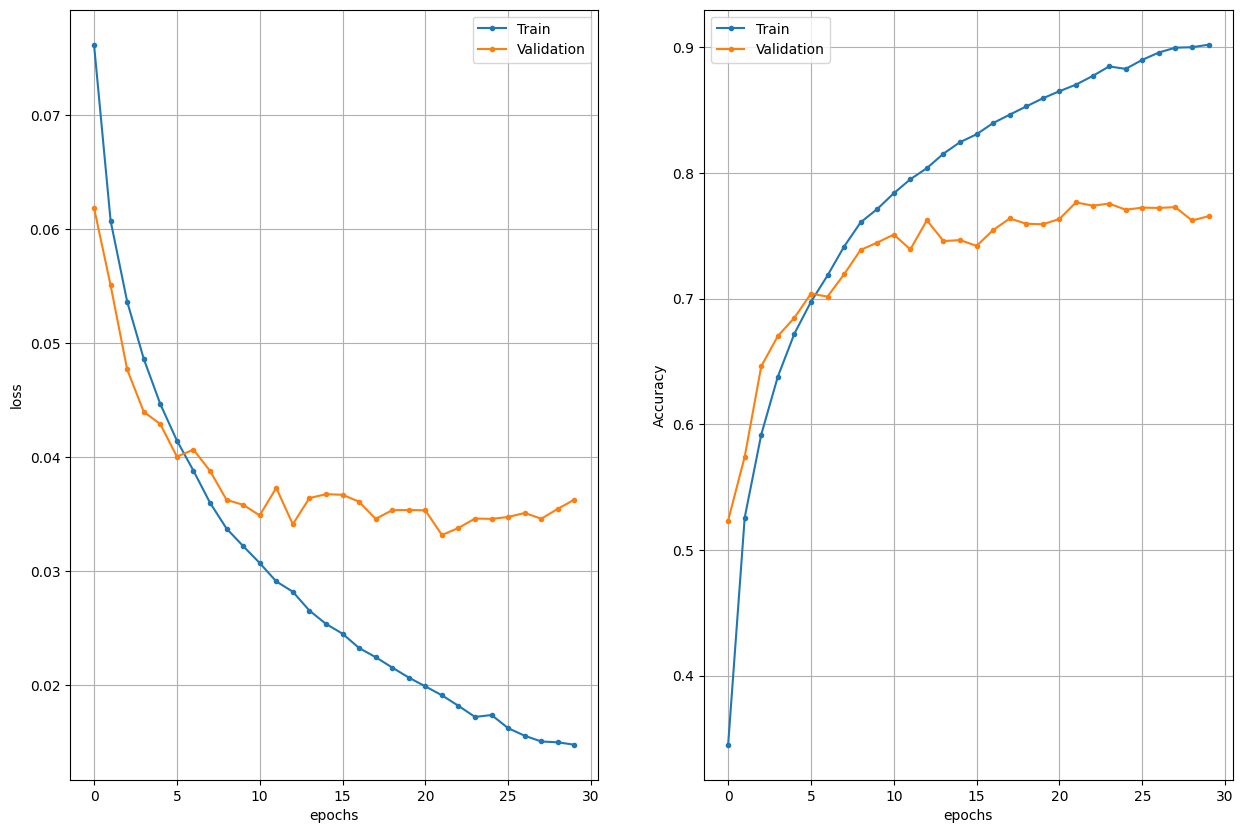

In [43]:
def plot_history(history):
  # Show training history (this cell is complete, nothing to implement here :-) )
  h = history.history
  epochs = range(len(h['loss']))

  plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
  plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
  plt.legend(['Train', 'Validation'])
  plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                            epochs, h['val_accuracy'], '.-')
  plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'])

  print('Train Acc     ', h['accuracy'][-1])
  print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)

#### Evaluation

As we did in the previous lesson, we are going to evaluate the trained model.

In [44]:
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
True [3 8 8 0 6]
Pred [3 8 0 0 4]
Pred [[7.8781682e-07 3.5008470e-05 8.8755241e-06 9.9581128e-01 2.1591059e-07
  2.1192867e-03 1.9932154e-03 2.4164703e-07 2.6218408e-05 4.7932499e-06]
 [1.5807049e-05 4.5030738e-05 5.0111335e-11 1.5697909e-09 1.1129281e-12
  3.2934593e-15 2.4094030e-12 2.3915391e-11 9.9992955e-01 9.6866997e-06]
 [4.6450350e-01 3.8279299e-02 3.2925197e-01 1.9968957e-02 4.9156629e-02
  3.8186682e-03 4.4526765e-03 2.2093877e-02 2.8730836e-02 3.9743718e-02]
 [5.2948439e-01 3.4276508e-03 4.2347351e-01 6.7079179e-03 2.2192630e-03
  1.8865619e-06 5.2179872e-05 4.9893810e-05 3.4290534e-02 2.9279789e-04]
 [1.4824668e-10 7.5455260e-09 2.3836325e-05 2.6734690e-06 9.6538967e-01
  5.6159574e-06 3.4578148e-02 6.4456129e-10 3.6449091e-10 5.0287408e-10]]
(10000, 10)


In [45]:
y_pred = np.argmax(y_pred, axis=1)

for digit in range(num_classes):
    mask = y_true == digit

    tp = np.sum(y_pred[mask] == digit)
    total = np.sum(mask)

    print(classes[digit], ' acc', tp/total)

print('y_true', y_true[mask])
print('y_pred', y_pred[mask])

plane  acc 0.76
car  acc 0.838
bird  acc 0.722
cat  acc 0.689
deer  acc 0.733
dog  acc 0.602
frog  acc 0.802
horse  acc 0.766
ship  acc 0.831
truck  acc 0.783
y_true [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 

### Questions
* What is the overall accuracy of the classifier?

  Train Acc      0.9020666480064392
  Validation Acc 0.7656000256538391
* What modifications would you do in order to improve the classification accuracy?

  I increase number of layers and number of filters in it.
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

  I add dropout layer before out layer.
  